# Get historical data

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv("hist_data.csv")

# remove dates
df = df.drop(columns = ['Date'])

In [17]:
# get single series
# Do this for all stocks

stocklist = df.columns.tolist()
stock_ts = df[stocklist[2]]


<Axes: >

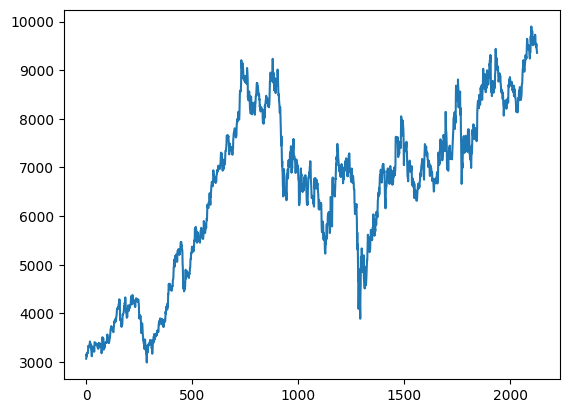

In [18]:
stock_ts.plot()

In [19]:
stock_ts = stock_ts.reset_index(drop=True).values
type(stock_ts)

numpy.ndarray

# LSTM

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [10]:
def prepare_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

In [11]:
def create_lstm_model(input_shape, units=50):
    model = keras.Sequential()
    model.add(layers.LSTM(units, input_shape=input_shape))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss
    return model

In [20]:
# Specify the number of LSTM units and the window size for data preparation
units = 50
window_size = 10

# Specify the number of future time steps to predict
future_steps = 5

In [21]:
# prepare data
X, y = prepare_data(stock_ts, window_size)

In [22]:
# train LSTM
input_shape = (X.shape[1], 1)
model = create_lstm_model(input_shape, units)
history = model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
67/67 [==============================] - 3s 5ms/step - loss: 46001100.0000
Epoch 2/10
67/67 [==============================] - 0s 5ms/step - loss: 45985696.0000
Epoch 3/10
67/67 [==============================] - 0s 5ms/step - loss: 45970452.0000
Epoch 4/10
67/67 [==============================] - 0s 5ms/step - loss: 45955260.0000
Epoch 5/10
67/67 [==============================] - 0s 5ms/step - loss: 45940060.0000
Epoch 6/10
67/67 [==============================] - 0s 5ms/step - loss: 45924872.0000
Epoch 7/10
67/67 [==============================] - 0s 6ms/step - loss: 45909724.0000
Epoch 8/10
67/67 [==============================] - 1s 8ms/step - loss: 45894544.0000
Epoch 9/10
67/67 [==============================] - 1s 8ms/step - loss: 45879360.0000
Epoch 10/10
67/67 [==============================] - 1s 8ms/step - loss: 45864176.0000


In [23]:
future_values = []

# Use the last window of data as the initial input
current_window = stock_ts[-window_size:].reshape(1, -1, 1)

for _ in range(future_steps):
    next_value = model.predict(current_window)[0, 0]
    future_values.append(next_value)
    current_window = np.roll(current_window, shift=-1, axis=1)
    current_window[0, -1, 0] = next_value

1/1 [==============================] - 0s 18ms/step


In [ ]:
# Plot of forecasted and original time series
forecasted_data = np.concatenate([stock_ts, future_values])
time = np.arange(len(forecasted_data))
plt.plot(time, forecasted_data, color='blue', label='Original Time Series')
plt.plot(time[len(stock_ts):], future_values, color='red', label='Forecasted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()